# Step by Step example

## Import Libraries

In [ ]:

from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load data

In [ ]:

# load the dataset
dataset = loadtxt('diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

## Exploring Dataset

In [ ]:
import pandas as pd

# dataset
df = pd.read_csv('diabetes.csv')
pd.set_option("display.max.columns", None)
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Define Model

In [ ]:

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


## Compile Model

In [ ]:

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit Model

In [ ]:

# fit the keras model on the dataset
history = model.fit(X, y, validation_split=0.33, epochs=15, batch_size=10)

Epoch 1/15
52/52 [==============================] - 1s 7ms/step - loss: 5.4383 - accuracy: 0.5039 - val_loss: 1.8081 - val_accuracy: 0.5236
Epoch 2/15
52/52 [==============================] - 0s 4ms/step - loss: 1.7992 - accuracy: 0.5214 - val_loss: 1.5657 - val_accuracy: 0.6024
Epoch 3/15
52/52 [==============================] - 0s 3ms/step - loss: 1.5829 - accuracy: 0.5292 - val_loss: 1.3571 - val_accuracy: 0.4764
Epoch 4/15
52/52 [==============================] - 0s 4ms/step - loss: 1.3536 - accuracy: 0.5545 - val_loss: 1.1256 - val_accuracy: 0.5039
Epoch 5/15
52/52 [==============================] - 0s 3ms/step - loss: 1.1770 - accuracy: 0.5389 - val_loss: 0.9523 - val_accuracy: 0.5551
Epoch 6/15
52/52 [==============================] - 0s 5ms/step - loss: 1.0441 - accuracy: 0.5545 - val_loss: 0.8427 - val_accuracy: 0.5787
Epoch 7/15
52/52 [==============================] - 0s 5ms/step - loss: 0.9516 - accuracy: 0.5545 - val_loss: 0.8158 - val_accuracy: 0.5866
Epoch 8/15
52/52 [==

## Evaluate Model (Optional)

In [ ]:

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 33.9652 - accuracy: 0.3490
Accuracy: 34.90


## Make Predictions

In [ ]:
# predictions = (model.predict(X) > 0.5).astype(int)
predictions = (model.predict(X)).astype(int)

24/24 [==============================] - 0s 2ms/step


## Print Summary

In [ ]:
# summarize the first 5 cases
for i in range(5):
 print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)


## Visualization

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


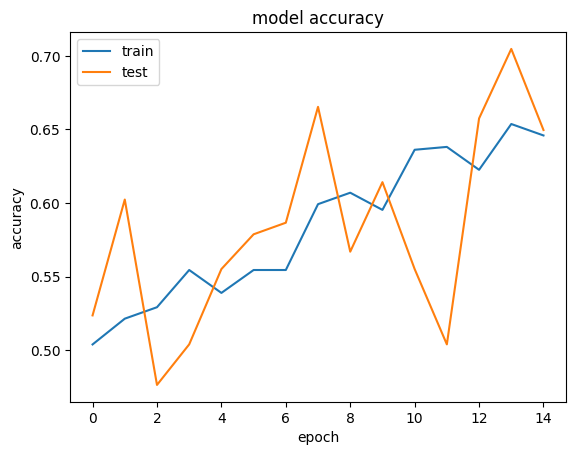

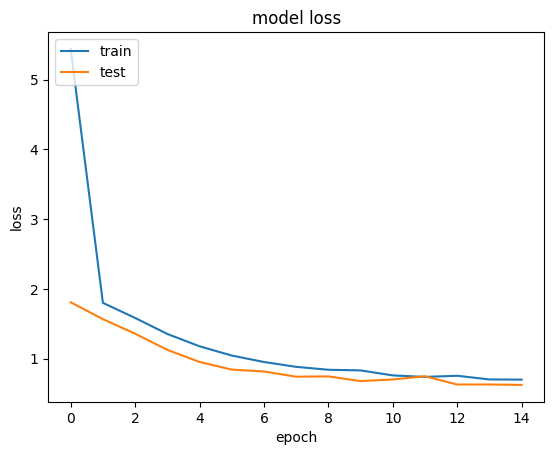

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()